In [103]:
#importing libraries 
import pandas as pd 
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
#importing medical cost dataset
df = pd.read_csv('Medical Cost Dataset.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
# Check for missing data in each column
missing_data = df.isnull().sum()
print(missing_data)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [91]:
## Checking for Duplicates ##

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print("Number of duplicates:", num_duplicates)

# Filter the DataFrame to get the duplicate rows
duplicate_rows = df.duplicated()
duplicated_data = df[duplicate_rows]
duplicated_data

Number of duplicates: 0


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [92]:
df[df['charges']==1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [93]:
#dropping the duplicated row 
df.drop_duplicates(inplace=True)

In [94]:
## Checking for Duplicates after drop ##

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print("Number of duplicates:", num_duplicates)

# Filter the DataFrame to get the duplicate rows
duplicate_rows = df.duplicated()
duplicated_data = df[duplicate_rows]
duplicated_data

Number of duplicates: 1


,age,sex,bmi,children,smoker,region,charges


In [83]:
""" Changing categorical values to numerical values ##
def change_gender(x):
    if x == 'male':
        return 0
    else:
        return 1

def change_smoker(x):
    if x == 'yes':
        return 0
    else:
        return 1
    
df['sex']= df['sex'].apply(lambda x: change_gender(x))
df['smoker']=df['smoker'].apply(lambda x: change_smoker(x)) """

In [ ]:
## Visualizing the Data ##

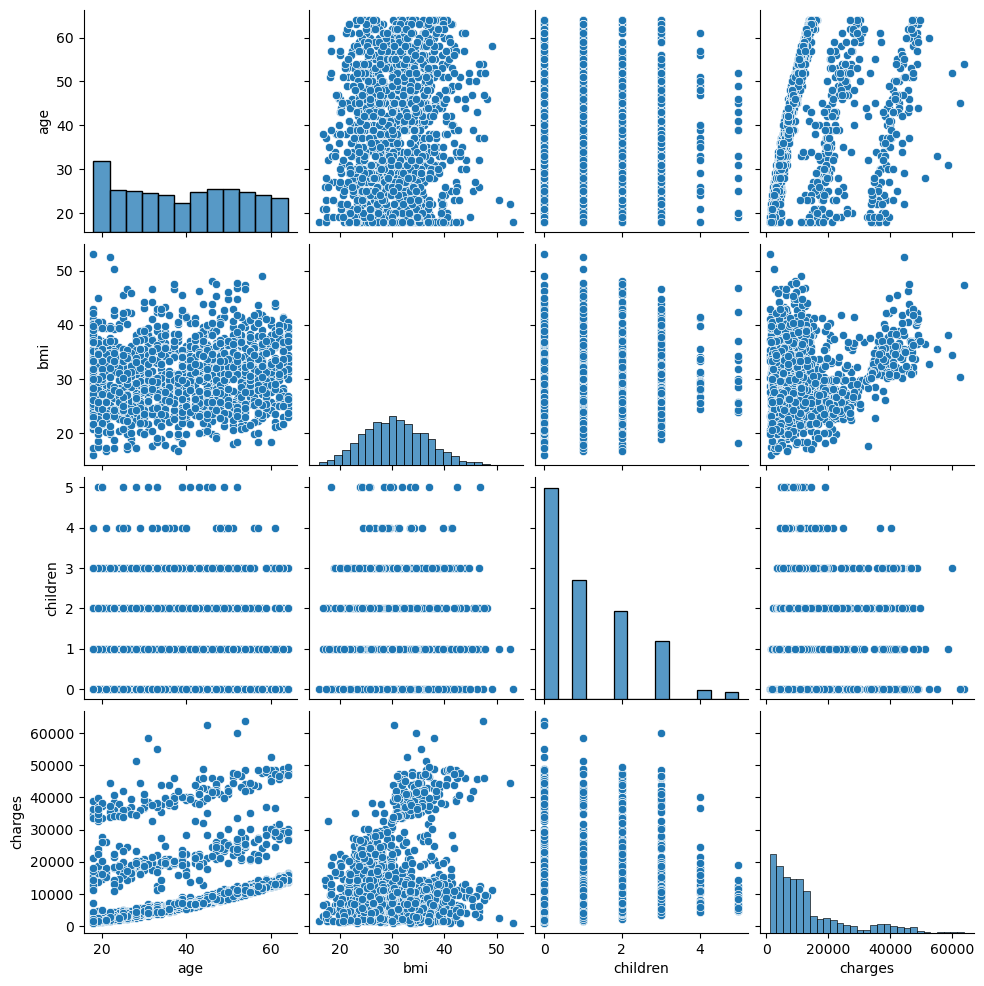

In [95]:
sns.pairplot(df)

In [96]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


Text(0.5, 1.0, 'Age Distribution')

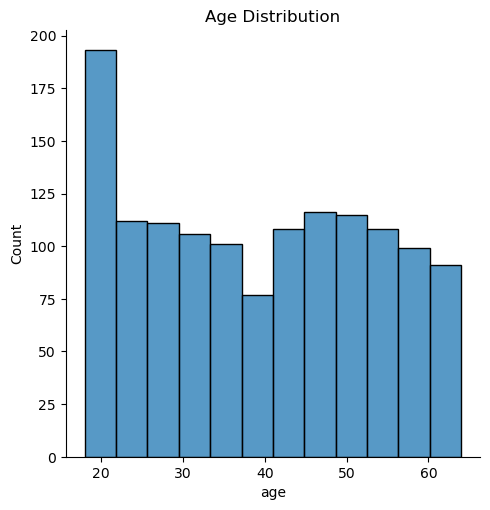

In [56]:
## Age Distribution ##
sns.displot(df['age'])
plt.title('Age Distribution')

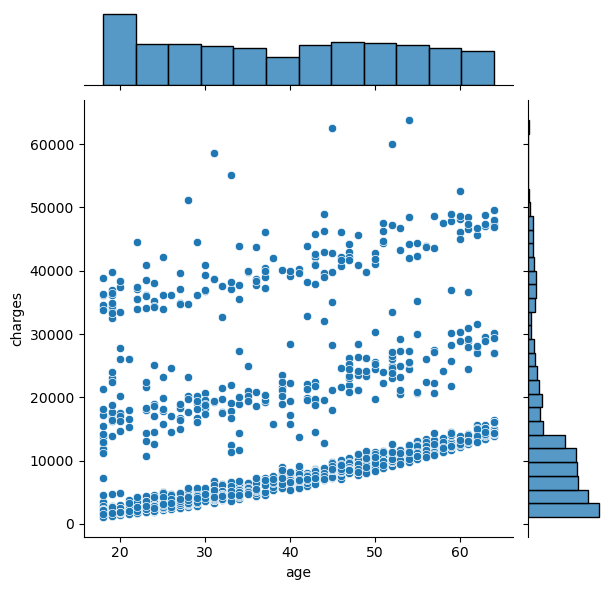

In [97]:
## joint plot with age and charges ##
sns.jointplot(x = 'age', y= 'charges', data = df)

Text(0.5, 1.0, 'Charges per Gender')

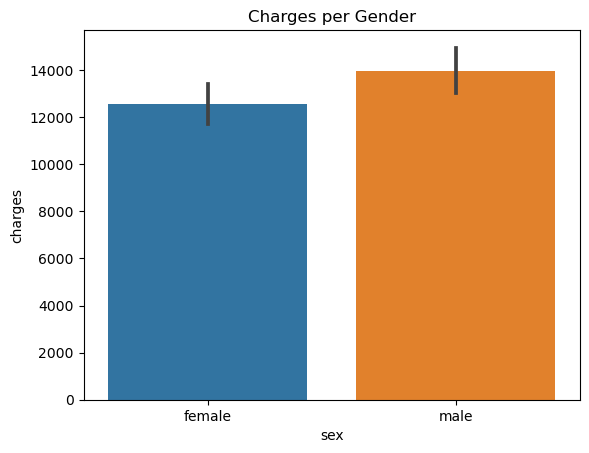

In [98]:
## bar chart with age and gender ##

sns.barplot(x = 'sex', y= 'charges', data = df)
plt.title('Charges per Gender')

Text(0.5, 1.0, 'Charges per Smoker Status')

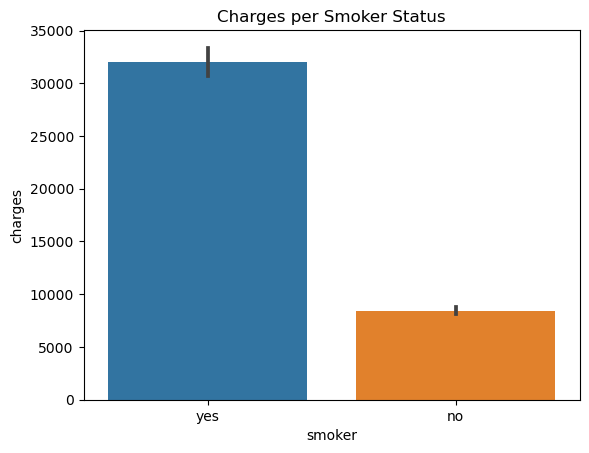

In [100]:
sns.barplot(x = 'smoker', y= 'charges', data = df)
plt.title('Charges per Smoker Status')

Text(0.5, 1.0, 'Charges per Region')

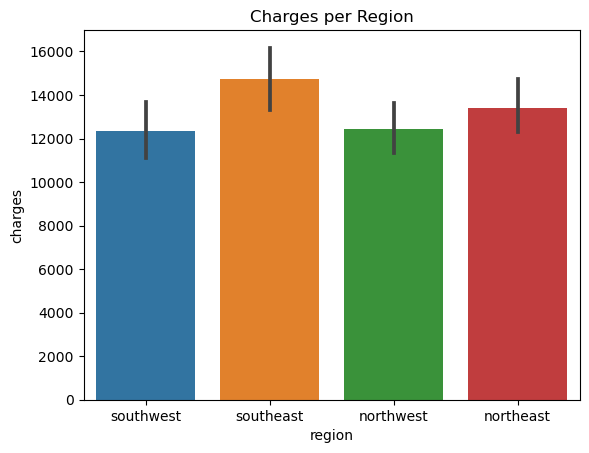

In [101]:
sns.barplot(x = 'region', y= 'charges', data = df)
plt.title('Charges per Region')

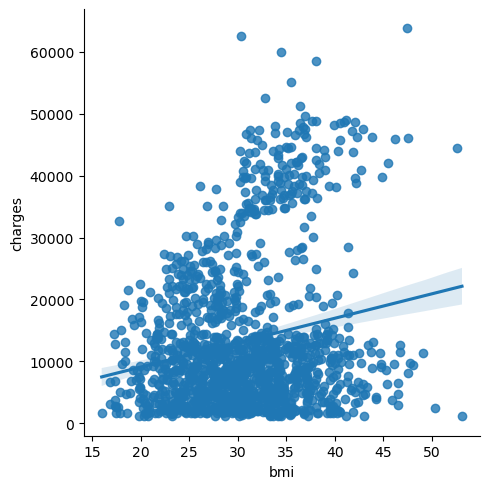

In [105]:
sns.lmplot(x = 'bmi', y= 'charges', data = df)

In [104]:
#t-test to compare charges between smokers and non-smokers

# two groups: smokers and non-smokers
smoker_group = df[df['smoker'] == 'yes']['charges']
non_smoker_group = df[df['smoker'] == 'no']['charges']

# t-test
t_statistic, p_value = ttest_ind(smoker_group, non_smoker_group)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 46.64479459840305
P-Value: 1.4067220949376498e-282


In [ ]:
""" The t-statistic is large (46.64479459840305), indicating a substantial difference in charges between 
smokers and non-smokers. The p-value is extremely small (approximately 1.4067220949376498e-282), which suggests 
very strong evidence against the null hypothesis and provides support for the presence of a significant 
difference in healthcare costs between the two groups."""

In [108]:

# Calculate the IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

# Print the outliers
print(outliers)

df_no_outliers = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


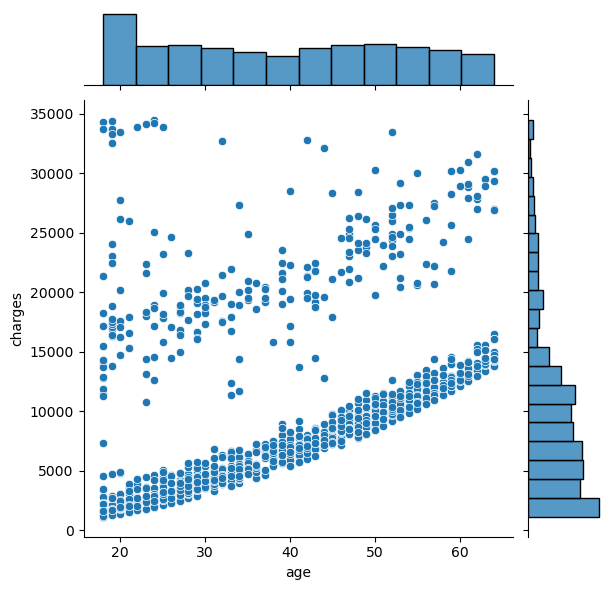

In [111]:
sns.jointplot(x = 'age', y= 'charges', data = df_no_outliers)

<AxesSubplot:xlabel='children', ylabel='charges'>

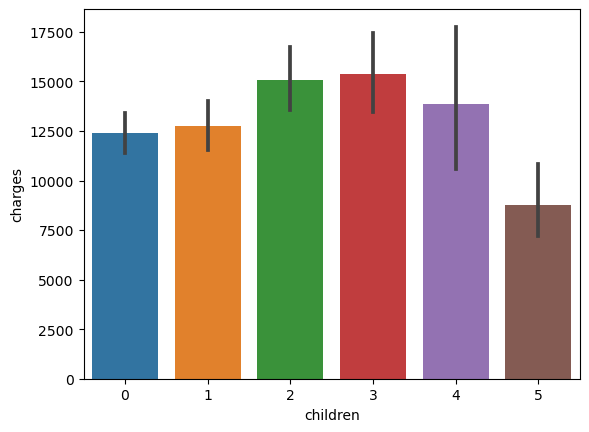

In [114]:
sns.barplot(x = 'children', y='charges', data = df)